In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("titanic.csv")

# Общая таблица

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Разбейте исходную таблицу на 2: по полу пассажиров

In [17]:
# Мужчины
male = df[df['Sex'] == 'male']
male
# print("Мужчины:")
# print(male_df.head())

# print("\\nЖенщины:")
# print(female_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
female = df[df['Sex'] == 'female']
female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### Удалите пустые строки или заполните их соответствующими символами

In [44]:
df = df.replace(r'^\\s*$', np.nan, regex=True) # Поиск ячеек с NaN
empty_rows = df.isnull().all(axis=1) # Поиск полностью пустых строк
if empty_rows.any(): # Условие - если будут найдены полностью пустые строки - удалить.
    print("Обнаружены полностью пустые строки. Они будут удалены.")
    df = df[~empty_rows]  # Оставляем только строки, *не* являющиеся полностью пустыми
else:
    print("Полностью пустые строки не найдены.")
df = df.fillna('TTT') # Записывем в пустые ячейкм вместо NaN 
df

Полностью пустые строки не найдены.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,TTT,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,TTT,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,TTT,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,TTT,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,TTT,1,2,W./C. 6607,23.4500,TTT,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Построить гистограмму распределения пассажиров по возрасту

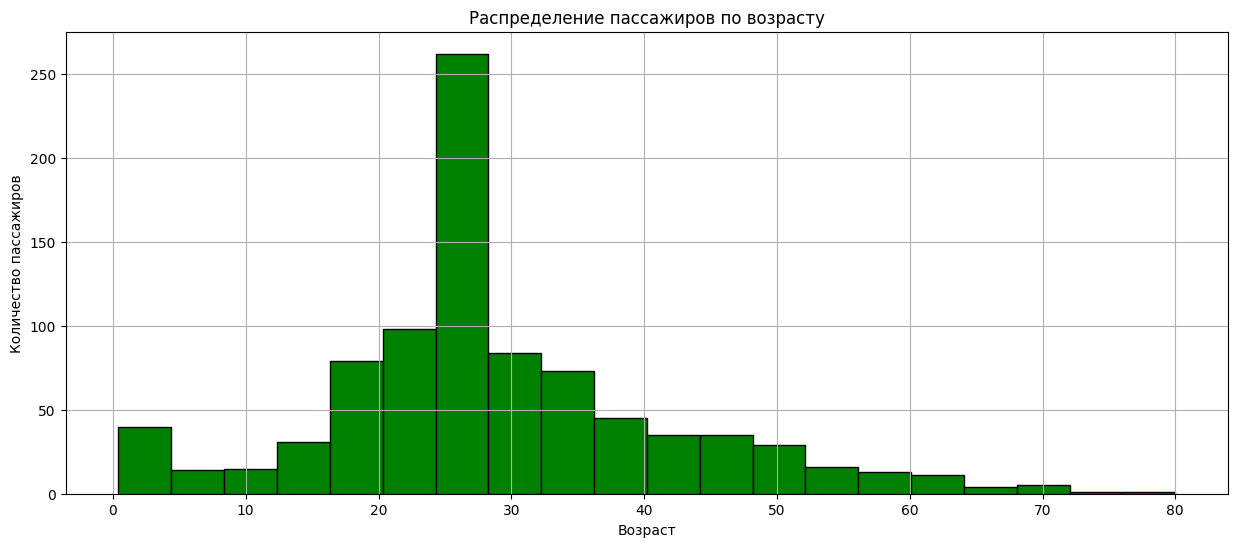

In [69]:
df['Age'] = df['Age'].replace('TTT', pd.NA)# Изменяем тип string (TTT) на числовой 

plt.figure(figsize=(15, 6))  # Увеличение размера графика для лучшей видимости
plt.hist(df['Age'], bins=20, edgecolor='black', color='green')  # bins - количество столбцов
plt.title('Распределение пассажиров по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid(True)  # Добавление сетки для лучшей читаемости
plt.show()

## Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола

### Минимальный возраст

In [133]:
data = pd.read_csv('titanic.csv')
# min_age_gender = data.groupby('Sex')['Age'].min()
# print(min_age_gender)
min_age_male = data[data['Sex'] == 'male']['Age'].min()
min_age_female = data[data['Sex'] == 'female']['Age'].min()

print("Минимальный возраст у мужчин:", min_age_male)
print("Минимальный возраст у женщин:", min_age_female)


Минимальный возраст у мужчин: 0.42
Минимальный возраст у женщин: 0.75


### Максимальный возраст 

In [134]:
data = pd.read_csv('titanic.csv')
# max_age_gender = data.groupby('Sex')['Age'].max()
# print(max_age_gender)
max_age_male = data[data['Sex'] == 'male']['Age'].max()
max_age_female = data[data['Sex'] == 'female']['Age'].max()

print("Максимальный возраст у мужчин:", max_age_male)
print("Максимальный возраст у женщин:", max_age_female)

Максимальный возраст у мужчин: 80.0
Максимальный возраст у женщин: 63.0


### Средний возраст каждого пола

In [137]:
data = pd.read_csv('titanic.csv')
# average_age_gender = data.groupby('Sex')['Age'].mean()
# print(average_age_gender)
average_age_male = data[data['Sex'] == 'male']['Age'].mean()
average_age_female = data[data['Sex'] == 'female']['Age'].mean()

print("Средний возраст у мужчин:", average_age_male)
print("Средний возраст у женщин:", average_age_female)

Средний возраст у мужчин: 30.72664459161148
Средний возраст у женщин: 27.915708812260537


### Медиана 

In [138]:
data = pd.read_csv('titanic.csv')
# median_age_gender = data.groupby('Sex')['Age'].median()
# print(median_age_gender)
median_age_male = data[data['Sex'] == 'male']['Age'].median()
median_age_female = data[data['Sex'] == 'female']['Age'].median()

print("Возраст в середине списка у мужчин:", median_age_male)
print("Возраст в середине списка у женщин:", median_age_female)

Возраст в середине списка у мужчин: 29.0
Возраст в середине списка у женщин: 27.0


### Мода возраста 

In [139]:
data = pd.read_csv('titanic.csv')

mode_age_male = data[data['Sex'] == 'male']['Age'].mode()[0]
mode_age_female = data[data['Sex'] == 'female']['Age'].mode()[0]

print("Наиболее часто встречающийся возраст у мужчин: ", mode_age_male)
print("Наиболее часто встречающийся возраст у женщин: ", mode_age_female)


Наиболее часто встречающийся возраст у мужчин:  19.0
Наиболее часто встречающийся возраст у женщин:  24.0


## Визуализировать возраст при помощи различных настроек метода plot

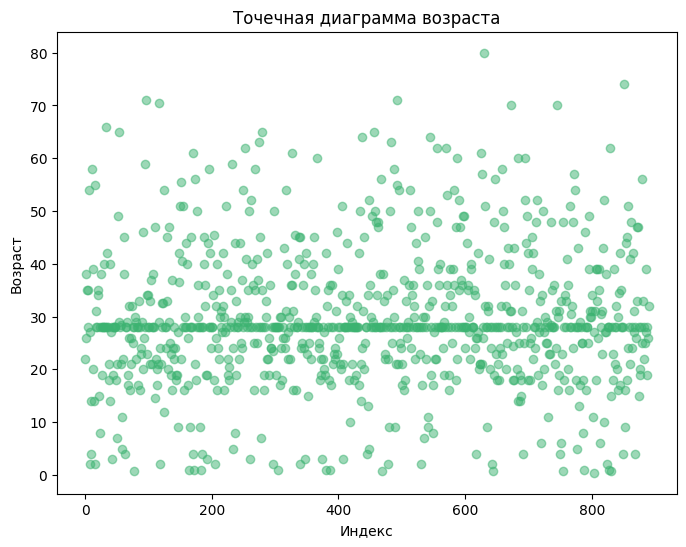

In [150]:
data['Age'] = data['Age'].fillna(data['Age'].median())
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['Age'], alpha=0.5, color='mediumseagreen') # index как ось X, alpha - прозрачность
plt.title('Точечная диаграмма возраста')
plt.xlabel('Индекс')
plt.ylabel('Возраст')
plt.show()